# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Assignment

1) Load the provided .csv file with the used car data

2) Use a linear regression to estimate the car prices from the year, kilometers or engine power. You can make a simple 1D regression from each one of the parameters independently (as an optional task you can also try a 2D or 3D regression combining multiple cues)

3) Firstly perform the estimation using the scipy linregress function (or alternatively you can use the sklearn.linear_model.LinearRegression class).
NB: check the documentation of the two methods!! In particular be aware of the number of outputs (in case use "_" to avoid the return of a specific output).

4) Have a look at the correlation coefficient to see which of the 3 features works better

5) Then implement the least square algorithm: you should get exactly the same solution of linregress !

6) Plot the data and the lines representing the output of the linregress and least square algorithms


In [2]:
import matplotlib.pyplot as plt
import csv
from scipy import stats 
from scipy.stats import linregress
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [3]:
# Load the provided data file with the used car data (you can also have a look at it with any text editor)

filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')

# place your loading code here
km = []
year = []
powerPS = []
avgPrice = []
dataset = []
firstline = True;

for l in lines:
    if firstline == True:
        firstline = False
        continue

    km.append(float(l[0]))
    year.append(float(l[1]))
    powerPS.append(float(l[2]))
    avgPrice.append(float(l[3]))
    dataset.append([float(l[0]), float(l[1]), float(l[2]), float(l[3])])

print("Elements: ", len(dataset))
print(np.array(dataset))

Elements:  1297
[[1.250000e+05 2.001000e+03 4.000000e+01 1.371110e+03]
 [1.500000e+05 2.001000e+03 4.000000e+01 1.298700e+03]
 [5.000000e+03 2.001000e+03 6.000000e+01 1.232430e+03]
 ...
 [2.000000e+04 2.015000e+03 2.600000e+02 4.949238e+04]
 [1.000000e+04 2.015000e+03 3.000000e+02 3.854269e+04]
 [2.000000e+04 2.015000e+03 3.000000e+02 3.968332e+04]]


Use linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




In [38]:
# linear regression with linregress (estimate price from year)

result0 = linregress(np.array(year), np.array(avgPrice))
print(result0.intercept, result0.slope)

-3018309.4849569616 1509.0938253352228


In [40]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
# Recall that in Python a mx1 matrix is different from a 1D array -> need to reshape

linreg = linear_model.LinearRegression()
linreg.fit(np.array([year]).T, np.array([avgPrice]).T)
print(linreg.intercept_, linreg.coef_)

[-3018309.48495696] [[1509.09382534]]


In [52]:
# (Optional) perform linear regression with a manually implemented least squares (estimate price from year)
# You should get exactly the same solution of linregress !
M = np.zeros((len(year), len(avgPrice)))
b = []
for i in range(len(year)): 
    b.append(avgPrice[i] * year[i])
for i in range(len(year)):
    for j in range(len(year)):
        M[i][j] = np.array(year[i]) * np.array(year[j]).T

w = np.linalg.inv(M) * b

LinAlgError: Singular matrix

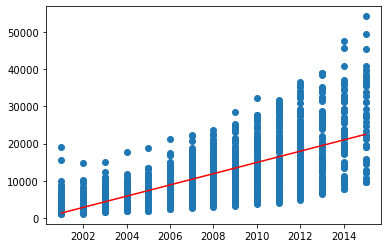

In [16]:
# Plot the data and the lines representing the output of the linregress and least square algorithms

plt.plot(np.array(year), np.array(avgPrice), 'o', label='original data')
plt.plot(np.array(year), result0.intercept + result0.slope * np.array(year), 'r', label='fitted line')
plt.show()

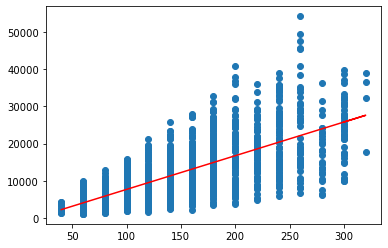

In [17]:
# linear regression with linregress (estimate price from power)

result1 = linregress(np.array(powerPS), np.array(avgPrice))
plt.plot(np.array(powerPS), np.array(avgPrice), 'o', label='original data')
plt.plot(np.array(powerPS), result1.intercept + result1.slope * np.array(powerPS), 'r', label='fitted line')
plt.show()

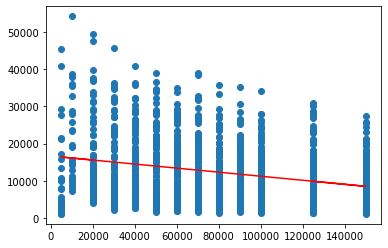

In [18]:
# linear regression with linregress (estimate price from km)

result2 = linregress(np.array(km), np.array(avgPrice))
plt.plot(np.array(km), np.array(avgPrice), 'o', label='original data')
plt.plot(np.array(km), result2.intercept + result2.slope * np.array(km), 'r', label='fitted line')
plt.show()

In [19]:
# Have a look at the correlation coefficients to see which of the 3 features works better

print("Correlation Year/Price: ", result0.rvalue)
print("Correlation Power/Price: ", result1.rvalue)
print("Correlation Km/Price: ", result2.rvalue)

Correlation Year/Price:  0.6767043169095445
Correlation Power/Price:  0.7085500315263967
Correlation Km/Price:  -0.25728674299884974


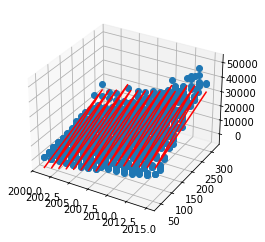

In [56]:
# (Optional) 2D linear regression with linear model (estimate price from year and power)

yearpower = np.array([year, powerPS]).T
linreg2D = linear_model.LinearRegression()
linreg2D.fit(yearpower, avgPrice)
ax = plt.axes(projection='3d')
ax.plot(np.array(year), np.array(powerPS), np.array(avgPrice), 'o', label='original data')
ax.plot(np.array(year), np.array(powerPS), linreg2D.intercept_ + linreg2D.coef_[0] * np.array(year) + linreg2D.coef_[1] * np.array(powerPS), 'r', label='fitted line')
plt.show()